# Cleaning and Preprocessing Data for Machine Learning

In [ ]:
# import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [32]:
# Read the csv file into a pandas DataFrame

crime_df = pd.read_csv('psa_data.csv')
crime_df = crime_df.dropna()
crime_df.head()

,cnt,OFFENSE,PSA
0,943,THEFT/OTHER,207.0
1,909,THEFT/OTHER,106.0
2,866,THEFT/OTHER,302.0
3,842,THEFT/OTHER,208.0
4,813,THEFT/OTHER,307.0


In [33]:
crime_df.count()

cnt        463
OFFENSE    463
PSA        463
dtype: int64

In [34]:
crime_df.dtypes

cnt          int64
OFFENSE     object
PSA        float64
dtype: object

In [35]:
X = crime_df[["OFFENSE", "cnt"]]
y = crime_df["PSA"].values.reshape(-1, 1)
print(X.shape, y.shape)

(463, 2) (463, 1)


# Working with Categorical Data - Dummy Encoding (Binary Encoded Data)

In [36]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data, columns=["OFFENSE", "cnt"])
data_binary_encoded.head()

,OFFENSE_ARSON,OFFENSE_ASSAULT W/DANGEROUS WEAPON,OFFENSE_BURGLARY,OFFENSE_HOMICIDE,OFFENSE_MOTOR VEHICLE THEFT,OFFENSE_ROBBERY,OFFENSE_SEX ABUSE,OFFENSE_THEFT F/AUTO,OFFENSE_THEFT/OTHER,cnt_1,...,cnt_716,cnt_752,cnt_756,cnt_778,cnt_787,cnt_813,cnt_842,cnt_866,cnt_909,cnt_943
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [37]:
# Scaling and Normalization
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,cnt,OFFENSE_ARSON,OFFENSE_ASSAULT W/DANGEROUS WEAPON,OFFENSE_BURGLARY,OFFENSE_HOMICIDE,OFFENSE_MOTOR VEHICLE THEFT,OFFENSE_ROBBERY,OFFENSE_SEX ABUSE,OFFENSE_THEFT F/AUTO,OFFENSE_THEFT/OTHER
104,168,0,1,0,0,0,0,0,0,0
301,32,0,0,0,0,0,1,0,0,0
5,787,0,0,0,0,0,0,0,0,1
116,140,0,0,0,0,0,0,0,1,0
45,321,0,0,0,0,0,0,0,1,0


In [38]:
# Standard Scalar
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [39]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

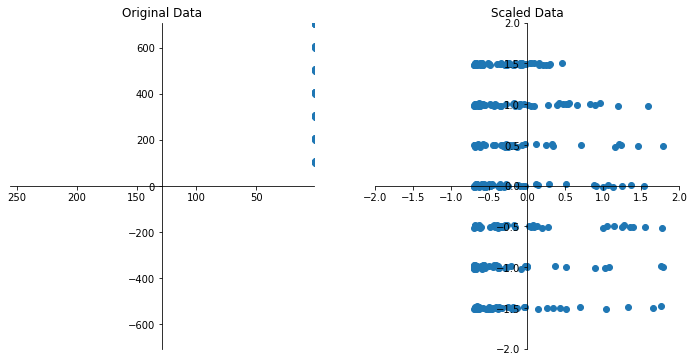

In [41]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["OFFENSE_ROBBERY"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["OFFENSE_ROBBERY"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [42]:
plt.show()

In [43]:
# Step 1) Convert Categorical data to numbers using Integer or Binary Encoding
X = pd.get_dummies(crime_df["PSA"])
y = crime_df["cnt"].values.reshape(-1, 1)

In [44]:
# Step 2) Split data into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [45]:
# Step 3) Scale or Normalize your data. Use StandardScaler if you don't know anything about your data.
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

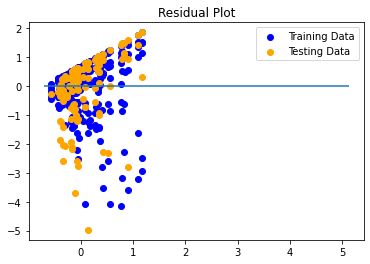

In [46]:
# Step 4) Fit the Model to the scaled training data and make predictions using the scaled test data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [47]:
# Step 5) Quantify your model using the scaled data
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(MSE)
print(r2)

1.412003614487279
-0.18291548256272838
